# Part 1: Explantion of Support Vector Machines (SVMs)

## What is SVM?

Support Vector Machines (SVM) is a supervised machine learning algorithm used for both classification and regression tasks. However, it is primarily known for its effectiveness in classification problems. SVM works by finding the optimal hyperplane that best separates the classes in the feature space.

## What Does SVM Do?

SVM classifies data by finding the hyperplane that maximizes the margin between the classes. The data points that are closest to the hyperplane and influence its position and orientation are called support vectors. The goal is to have the largest possible margin between the hyperplane and any data points of the classes.

## Why Use SVM?

SVM is used because of its robustness and effectiveness in high-dimensional spaces. Here are a few reasons:

1. Effective in High Dimensions: SVM is particularly effective when the number of dimensions (features) is greater than the number of samples.

2. Kernel Trick: SVMs use kernel functions to transform non-linear problems into linear ones by projecting the data into higher-dimensional space. This makes them versatile for complex problems.

3. Margin Maximization: SVM focuses on the points that are most difficult to classify (support vectors), which helps in achieving better generalization.

## Advantages of SVM:

1. Effective in High-Dimensional Spaces: SVM performs well in spaces with a large number of features.

2. Versatile: Through the use of kernel functions, SVMs can handle non-linear classification problems.

3. Robustness: It is less prone to overfitting, especially in high-dimensional spaces.

4. Memory Efficient: Only a subset of the training points (support vectors) is used in the decision function.

## Disadvantages of SVM:

1. Computationally Intensive: Training an SVM can be time-consuming and requires a lot of memory, especially with large datasets.

2. Difficult Parameter Tuning: Finding the right kernel and setting the right hyperparameters (such as C, gamma) can be challenging.

3. Not Probabilistic: SVM does not provide direct probability estimates.

4. Less Effective with Noisy Data: SVM is sensitive to noisy data, as outliers can affect the decision boundary.

## Limitations of SVM:
1. Performance on Large Datasets: SVM might not be the best choice for very large datasets because of its computational complexity.

2. Choice of Kernel: The performance of SVM largely depends on the choice of the kernel. Incorrect choice can lead to poor results.

3. Scalability: SVM's training time scales quadratically with the number of training samples, making it impractical for large datasets.

# Part 2: Python Implementation of a Basic Support Vector Machines Example

## Step 1: Create the Dataset
I generate the data using make_circles from scikit-learn.

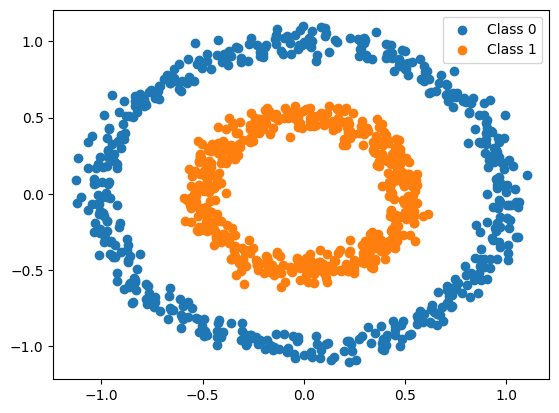

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate the data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Plot the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.legend()
plt.show()

## Step 2: Train a Classification Model
I use a Support Vector Machine (SVM) with a radial basis function (RBF) kernel, which is well-suited for non-linear classification problem.

Accuracy: 1.00


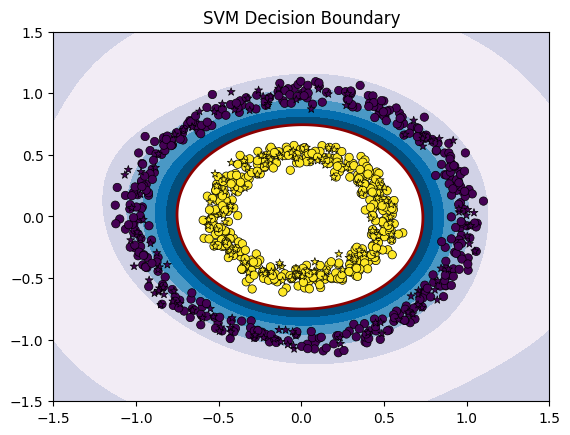

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', linewidth=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', linewidth=0.5, marker='*')
plt.title('SVM Decision Boundary')
plt.show()

## Explanation:
1. Dataset Generation: I use make_circles to generate data where class 0 points form an inner circle and class 1 points form an outer circle.
2. Model Training: I train an SVM classifier with an RBF kernel on the generated dataset.
3. Evaluation: I evaluate the model's performance using accuracy and visualize the decision boundary.